In [1]:
# Load Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

clean_df = pd.read_csv('Clean Data.csv')
clean_df = clean_df.iloc[:, 1:]
y = clean_df.iloc[:, 5].values
X = clean_df.drop('target', axis=1).values

We determined the best SVC model to be linear in the main file

In [17]:
# Function for running different penalties on LogR
# Returns an array of accuracies for each penalty value
def try_penalties_SVC(penalties, test_frac, reps):
    accuracies = np.zeros((reps, len(penalties)))
    for rep in range(reps):
        [testX, trainX] = test_train_ids(len(X), test_frac)
        test_data = X[testX, :]
        test_labels = y[testX]
        train_data = X[trainX, :]
        train_labels = y[trainX]
        for i, penalty in enumerate(penalties):
            model = SVC(C=penalty, kernel='linear');
            model.fit(train_data, train_labels)
            accuracies[rep, i] = model.score(test_data, test_labels) 
    return np.mean(accuracies, axis=0);

# Returns shuffled arrays of test indices and training indices
def test_train_ids(N,frac):
  inds = np.arange(N)
  np.random.shuffle(inds)
  n = int(frac*N)
  return inds[:n], inds[n:]

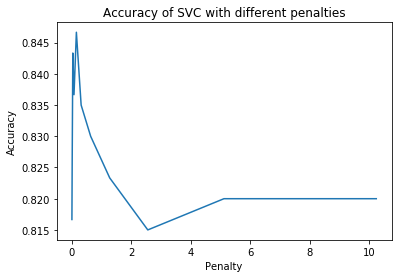

Best penalty for this model: C =  0.16


In [18]:
# Use static train/testing data to determine best penalty for this model
import warnings
warnings.simplefilter('ignore')

penalties = [0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24];
    
acc_avg = try_penalties_SVC(penalties, 0.2, 10)
plt.plot(penalties, acc_avg)
plt.title('Accuracy of SVC with different penalties')
plt.xlabel('Penalty')
plt.ylabel('Accuracy')
plt.show()

print("Best penalty for this model: C = ", penalties[np.argmax(acc_avg)])

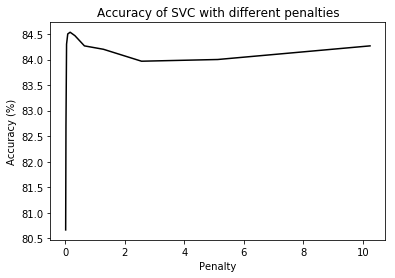

Best penalty for this model: C =  0.16


In [16]:
plt.plot(penalties ,100 * acc_avg, 'k-')
plt.title('Accuracy of SVC with different penalties')
plt.xlabel('Penalty')
plt.ylabel('Accuracy (%)')
plt.show()

print("Best penalty for this model: C = ", penalties[np.argmax(acc_avg)])